# Exercise: House price prediction
    
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



Dataset: https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv

Build a predictive model using SalesPrice as the outcome variable and the rest as predicter variables.

Find rmse and r2 score for training and test dataset. 



In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")
del df["Id"]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [4]:
df = df[~np.isnan(df.SalesPrice)]
df.shape

(1460, 79)

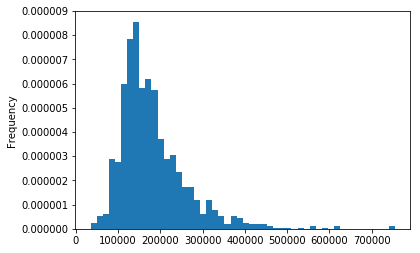

In [5]:
target = "SalesPrice"
df[target].plot.hist(bins = 50, normed = True)
target_mean = df[target].mean()
#plt.plot([target_mean, target_mean], [0, 1.0])

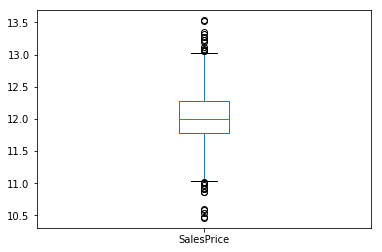

In [6]:
np.log(df[target]).plot.box()

In [7]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.007406285347507605 
test mse 8.727385076639865e+19 
training R2 0.9494616956035435 
test R2 -4.617920804724029e+20


In [8]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.01))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.01552703945002047 
test mse 0.022954852934347732 
training R2 0.8940480673803641 
test R2 0.8785389987905549


In [9]:
est = pipe.steps[-1][-1]
est.coef_

array([-0.01496146, -0.        ,  0.01185919,  0.10413487,  0.02330874,
        0.02946514,  0.02171262,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.00472336,  0.00772163,  0.        , -0.        ,
        0.09556319,  0.01803006,  0.        ,  0.01199834,  0.        ,
        0.        , -0.00227499,  0.01120831,  0.00815855,  0.        ,
        0.05589592,  0.        ,  0.01084966,  0.00460384,  0.        ,
        0.        ,  0.00599374, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.02643172,
        0.        ,  0.        ,  0.        ,  0.        , -0.00044357,
       -0.00159326,  0.        ,  0.        ,  0.        ,  0.00751756,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.00283564,  0.        ,
        0.01948933, -0.00664952, -0.        , -0.        , -0.00036926,
       -0.        , -0.        , -0.        , -0.        ,  0.00

# Feature selection using Lasso

In [10]:
pd.DataFrame({"feature": X.columns, "coef": est.coef_}).query("coef != 0").shape

(59, 2)

In [11]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Ridge(alpha=200))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.010607647895419826 
test mse 0.02330753065855508 
training R2 0.9276165428260786 
test R2 0.8766728753346996


In [12]:
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": X.columns, "coef": est.coef_}).query("coef != 0").shape

(252, 2)

In [13]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet(alpha=0.1, l1_ratio=0.8))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.041780619919859034 
test mse 0.0528172686757092 
training R2 0.7149013860108608 
test R2 0.7205280141481248


In [14]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 12345)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=0.1, l1_ratio=0.8, max_iter=1000))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.010438943878130599 
test mse 0.020526015122035956 
training R2 0.9369945827103774 
test R2 0.8570562329491609


In [15]:
import sklearn

In [16]:
sklearn.__version__

'0.19.1'

In [17]:
scores = model_selection.cross_val_score(pipe, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")

In [18]:
np.mean(scores)

-0.027645996964869402

In [19]:
scores

array([-0.01983137, -0.01744292, -0.05776021, -0.02262727, -0.02056822])

In [20]:
%%time 

y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 12345)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=0.1, l1_ratio=0.8, max_iter=1000))
])

param_grid = {
    "est__alpha": 10 ** np.linspace(-3, 2, 5),
    "est__l1_ratio": np.linspace(0.01, 0.99, 5)
}
gsearch = model_selection.GridSearchCV(cv=5, estimator=pipe, n_jobs=4, param_grid=param_grid)
gsearch.fit(X_train, y_train)

print("Test score using the best model", gsearch.best_estimator_.score(X_test, y_test))
print("Best params", gsearch.best_params_, 
      "best training score (cv): ", gsearch.best_score_)

X_train (1022, 258) X_test (438, 258)
Test score using the best model 0.8578647714710883
Best params {'est__alpha': 0.31622776601683794, 'est__l1_ratio': 0.99} best training score (cv):  0.8336904055789734
CPU times: user 1.35 s, sys: 162 ms, total: 1.51 s
Wall time: 36 s


In [21]:
gsearch.best_score_

0.8336904055789734

In [22]:
gsearch.best_params_

{'est__alpha': 0.31622776601683794, 'est__l1_ratio': 0.99}

In [23]:
gsearch.best_estimator_.score(X_test, y_test)

0.8578647714710883

In [24]:
np.linspace(-3, 2, 10)

array([-3.        , -2.44444444, -1.88888889, -1.33333333, -0.77777778,
       -0.22222222,  0.33333333,  0.88888889,  1.44444444,  2.        ])

In [25]:
10 ** np.linspace(-3, 2, 10)

array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02])

In [26]:
import pickle

pickle.dump?

In [27]:
with open("house_prediction.model", "wb") as f:
    pickle.dump(gsearch.best_estimator_, f)

In [28]:
with open("house_prediction.model", "rb") as f:
    est = pickle.load(f)

In [29]:
est.score(X_test, y_test)

0.8578647714710883

In [30]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
986,50,59.0,5310,6,8,1910,2003,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
411,190,100.0,34650,5,5,1955,1955,0.0,1056.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1123,20,50.0,9405,5,9,1947,2008,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
17,90,72.0,10791,4,5,1967,1967,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
792,60,92.0,9920,7,5,1996,1997,0.0,862.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1361,20,124.0,16158,7,5,2005,2005,16.0,1274.0,0.0,...,0,0,0,0,1,0,0,0,1,0
436,50,40.0,4400,6,8,1920,1950,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
73,20,85.0,10200,5,7,1954,2003,104.0,320.0,362.0,...,0,0,0,0,1,0,0,0,1,0
1195,60,51.0,8029,6,5,2005,2005,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
933,20,63.0,8487,7,5,2004,2004,210.0,20.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
est.predict(X_test.values[0].reshape(1, -1))

array([11.70919367])

In [32]:
X_test.iloc[0, :]

MSSubClass                 50.0
LotFrontage                59.0
LotArea                  5310.0
OverallQual                 6.0
OverallCond                 8.0
YearBuilt                1910.0
YearRemodAdd             2003.0
MasVnrArea                  0.0
BsmtFinSF1                  0.0
BsmtFinSF2                  0.0
BsmtUnfSF                 485.0
TotalBsmtSF               485.0
1stFlrSF                 1001.0
2ndFlrSF                  634.0
LowQualFinSF                0.0
GrLivArea                1635.0
BsmtFullBath                0.0
BsmtHalfBath                0.0
FullBath                    1.0
HalfBath                    0.0
BedroomAbvGr                2.0
KitchenAbvGr                1.0
TotRmsAbvGrd                5.0
Fireplaces                  0.0
GarageYrBlt              1950.0
GarageCars                  1.0
GarageArea                255.0
WoodDeckSF                394.0
OpenPorchSF                 0.0
EnclosedPorch               0.0
                          ...  
GarageCo